## Details:

- Sana Abdallah
- Milestone3 Project1
- 4/6/2025

## Importing libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## Data Loading & Understanding:

In [3]:
#load data
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)
data= pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\Data for 680 project1\new_data.csv")

In [6]:
# view few rows
data.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_Type,Brnd_Name,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Rndrng_Prvdr_Type,HCPCS_Cd,Tot_Srvcs
0,1003000126,Enkeshafi,Ardalan,Internal Medicine,Prednisone,11,11.2,88,59.42,Internal Medicine,99217,44
1,1003000126,Enkeshafi,Ardalan,Internal Medicine,Pravastatin Sodium,14,22.2,663,300.52,Internal Medicine,99217,44
2,1003000126,Enkeshafi,Ardalan,Internal Medicine,Pantoprazole Sodium,24,35.1,1052,429.87,Internal Medicine,99217,44
3,1003000126,Enkeshafi,Ardalan,Internal Medicine,Metoprolol Succinate,12,24.0,720,141.86,Internal Medicine,99217,44
4,1003000126,Enkeshafi,Ardalan,Internal Medicine,Losartan Potassium,13,33.0,990,189.60,Internal Medicine,99217,44


In [5]:
data.shape

(39563, 12)

In [17]:
data.columns

Index(['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_Type', 'Brnd_Name', 'Tot_Clms', 'Tot_30day_Fills',
       'Tot_Day_Suply', 'Tot_Drug_Cst', 'Rndrng_Prvdr_Type', 'HCPCS_Cd',
       'Tot_Srvcs'],
      dtype='object')

In [18]:
# data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39563 entries, 0 to 39562
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Prscrbr_NPI            39563 non-null  int64  
 1   Prscrbr_Last_Org_Name  39563 non-null  object 
 2   Prscrbr_First_Name     39563 non-null  object 
 3   Prscrbr_Type           39563 non-null  object 
 4   Brnd_Name              39563 non-null  object 
 5   Tot_Clms               39563 non-null  int64  
 6   Tot_30day_Fills        39563 non-null  float64
 7   Tot_Day_Suply          39563 non-null  int64  
 8   Tot_Drug_Cst           39563 non-null  float64
 9   Rndrng_Prvdr_Type      39563 non-null  object 
 10  HCPCS_Cd               39563 non-null  int64  
 11  Tot_Srvcs              39563 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3.6+ MB


## Data Cleaning:

In [19]:
# check for missing data
data.isnull().sum()

Prscrbr_NPI              0
Prscrbr_Last_Org_Name    0
Prscrbr_First_Name       0
Prscrbr_Type             0
Brnd_Name                0
Tot_Clms                 0
Tot_30day_Fills          0
Tot_Day_Suply            0
Tot_Drug_Cst             0
Rndrng_Prvdr_Type        0
HCPCS_Cd                 0
Tot_Srvcs                0
dtype: int64

In [20]:
# check for duplicates
data.duplicated().sum()

0

In [21]:
#Renaming columns
data = data.rename(columns={'Prscrbr_NPI':'Prescriber_NPI', 'Prscrbr_Last_Org_Name': 'Prescriber_LN', 'Prscrbr_First_Name':'Prescriber_FN',
       'Prscrbr_Type':'Prescriber_Type', 'Brnd_Name':'Brand_Name', 'Tot_Clms':'Total_Claims', 'Rndrng_Prvdr_Type':'Provider_Type',
       'HCPCS_Cd':'HCPCS_Code', 'Tot_Srvcs':'Total_Services'})


In [22]:
# concatenate the columns 'Prescriber/Provider_LN' and 'Prescriber/Provider_FN' to get one column ''Prescriber/Provider_FN'
data['Prescriber_FullName'] = data['Prescriber_FN'] + " " + data['Prescriber_LN']


In [23]:
#drop the columns 'Prescriber/Provider_LN' and 'Prescriber/Provider_FN'
data.drop(columns=['Prescriber_LN','Prescriber_FN'], axis=1,  inplace=True)

In [37]:
# create new columns
data['Avg_Cost_per_Claim'] = data['Tot_Drug_Cst'] / data['Total_Claims']
data['Claims_per_Service'] = data['Total_Claims'] / data['Total_Services']

In [38]:
# check the updates
data.head()

,Prescriber_NPI,Prescriber_Type,Brand_Name,Total_Claims,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Provider_Type,HCPCS_Code,Total_Services,Prescriber_FullName,Avg_Cost_per_Claim,Claims_per_Service
0,1003000126,Internal Medicine,Prednisone,11,11.2,88,59.42,Internal Medicine,99217,44,Ardalan Enkeshafi,5.401818,0.250000
1,1003000126,Internal Medicine,Pravastatin Sodium,14,22.2,663,300.52,Internal Medicine,99217,44,Ardalan Enkeshafi,21.465714,0.318182
2,1003000126,Internal Medicine,Pantoprazole Sodium,24,35.1,1052,429.87,Internal Medicine,99217,44,Ardalan Enkeshafi,17.911250,0.545455
3,1003000126,Internal Medicine,Metoprolol Succinate,12,24.0,720,141.86,Internal Medicine,99217,44,Ardalan Enkeshafi,11.821667,0.272727
4,1003000126,Internal Medicine,Losartan Potassium,13,33.0,990,189.60,Internal Medicine,99217,44,Ardalan Enkeshafi,14.584615,0.295455


## Data Exploration:

In [25]:
# statistic overview

In [26]:
data.describe(include='number')

,Prescriber_NPI,Total_Claims,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,HCPCS_Code,Total_Services
count,3.956300e+04,39563.000000,39563.000000,39563.000000,3.956300e+04,39563.000000,39563.000000
mean,1.003008e+09,60.509618,117.943156,3397.406870,9.476597e+03,88587.793646,107.703283
std,3.601511e+03,92.903360,185.482094,5497.440276,4.429032e+04,18086.722512,274.582436
min,1.003000e+09,11.000000,11.000000,13.000000,9.330000e+00,1938.000000,11.000000
25%,1.003006e+09,16.000000,27.000000,660.000000,3.335100e+02,87428.000000,20.000000
50%,1.003008e+09,28.000000,50.400000,1414.000000,9.093000e+02,93978.000000,36.000000
75%,1.003010e+09,66.000000,120.000000,3422.000000,3.181000e+03,99214.000000,96.000000
max,1.003012e+09,2662.000000,3830.600000,105314.000000,1.166852e+06,99497.000000,6889.000000


- 75% of total services are equal or less the 96 while there is a maximum of 6889.
- 75% of total claims are equal or less the 66 while there is a maximum of 2662.

This suggests the availability of certain extreme numbers of claims and services that can correspond to frauds.


In [27]:
data.describe(include='object')

,Prescriber_Type,Brand_Name,Provider_Type,Prescriber_FullName
count,39563,39563,39563,39563
unique,32,585,32,113
top,Family Practice,Gabapentin,Family Practice,Sam Fereidouni
freq,13161,508,13161,3225


The data includes 113 unique, different providers and prescribers, 32 unique service provider and 585 unique drug types.
The mostly frequent service provider type is Family Practice. 

## Data Visualization

In [28]:
data.head()

,Prescriber_NPI,Prescriber_Type,Brand_Name,Total_Claims,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Provider_Type,HCPCS_Code,Total_Services,Prescriber_FullName
0,1003000126,Internal Medicine,Prednisone,11,11.2,88,59.42,Internal Medicine,99217,44,Ardalan Enkeshafi
1,1003000126,Internal Medicine,Pravastatin Sodium,14,22.2,663,300.52,Internal Medicine,99217,44,Ardalan Enkeshafi
2,1003000126,Internal Medicine,Pantoprazole Sodium,24,35.1,1052,429.87,Internal Medicine,99217,44,Ardalan Enkeshafi
3,1003000126,Internal Medicine,Metoprolol Succinate,12,24.0,720,141.86,Internal Medicine,99217,44,Ardalan Enkeshafi
4,1003000126,Internal Medicine,Losartan Potassium,13,33.0,990,189.60,Internal Medicine,99217,44,Ardalan Enkeshafi


In [29]:
# distributions of total claims and total services

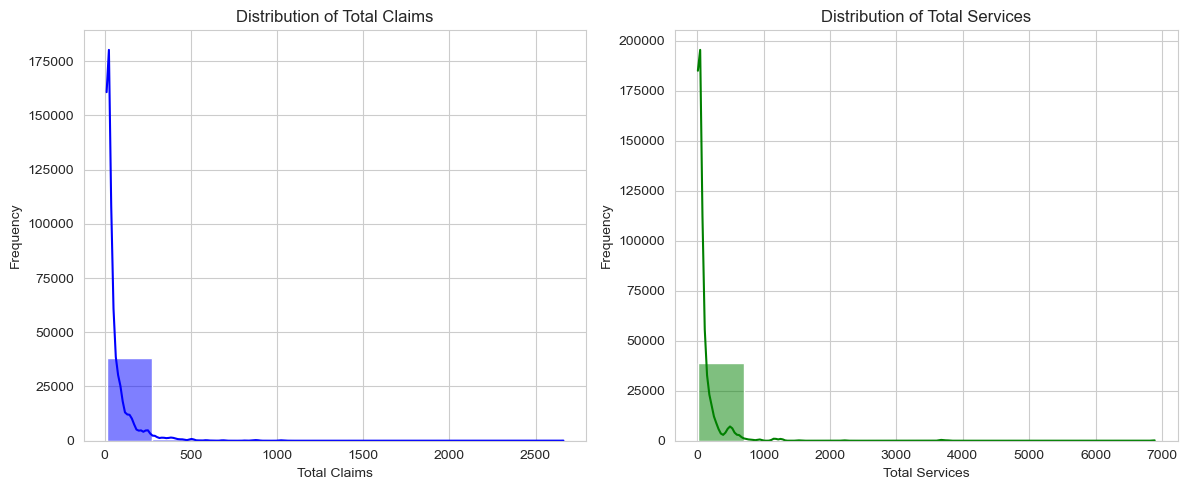

In [30]:

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Total Claims
sns.histplot(data['Total_Claims'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Total Claims")
axes[0].set_xlabel("Total Claims")
axes[0].set_ylabel("Frequency")

# Histogram for Total Services
sns.histplot(data['Total_Services'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Total Services")
axes[1].set_xlabel("Total Services")
axes[1].set_ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()


The frequency is extremly high with low number of total claims and total services not exceeding 100. 
Total services and total claims have right-skewed distributions, suggesting that some prescribers have high claim counts, and some providers declarent they made extremely high number of services.

In [31]:
# Total claims by prescriber NPI

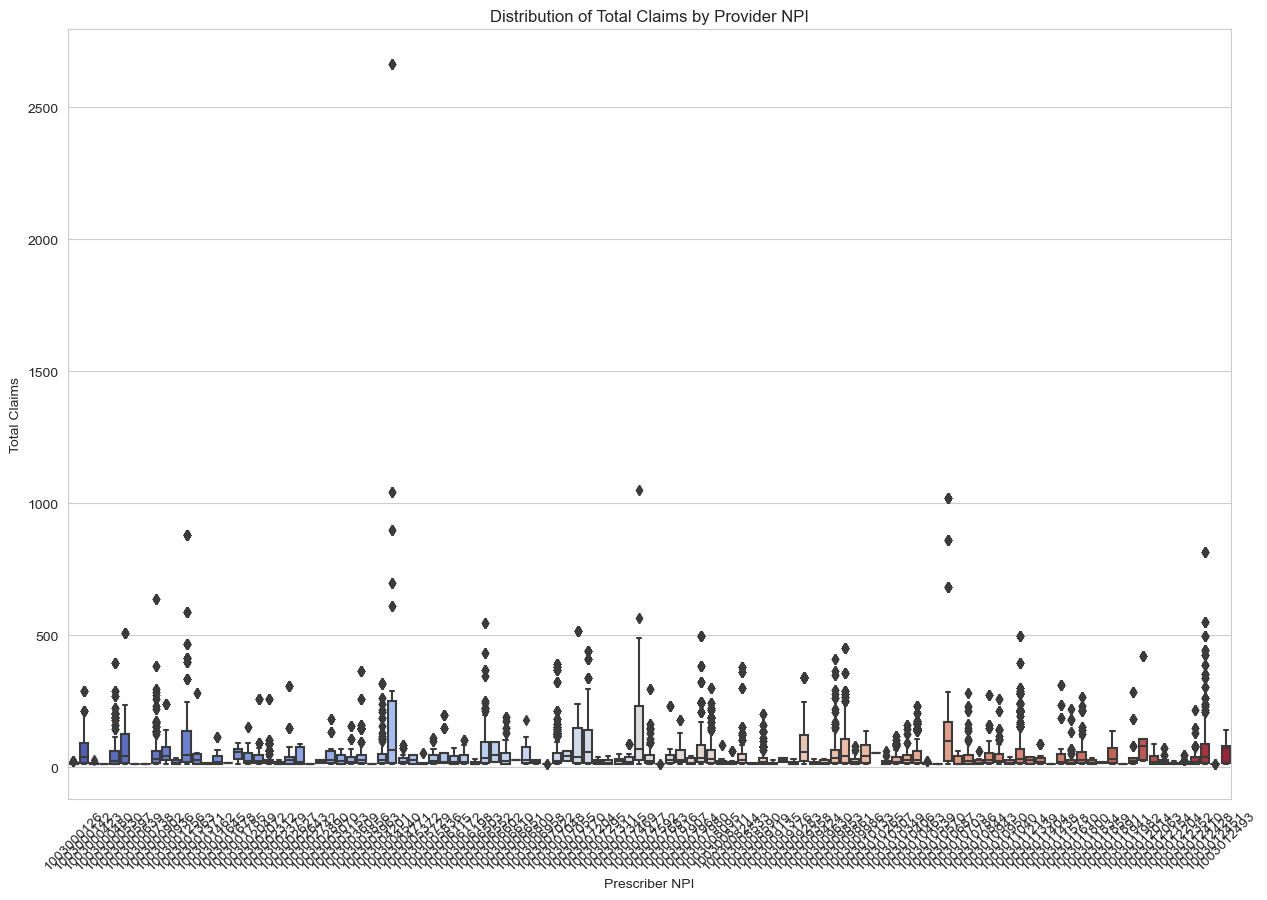

In [32]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Prescriber_NPI', y='Total_Claims', data=data, palette='coolwarm')
plt.xlabel("Prescriber NPI")
plt.ylabel("Total Claims")
plt.title("Distribution of Total Claims by Provider NPI")
plt.xticks(rotation=45)
plt.show()

The box plots highlight the extreme values in the total number of claims. High number of claims may correspond to suspicious providers.

In [350]:
# Claims vs. Drug Cost Scatter Plot

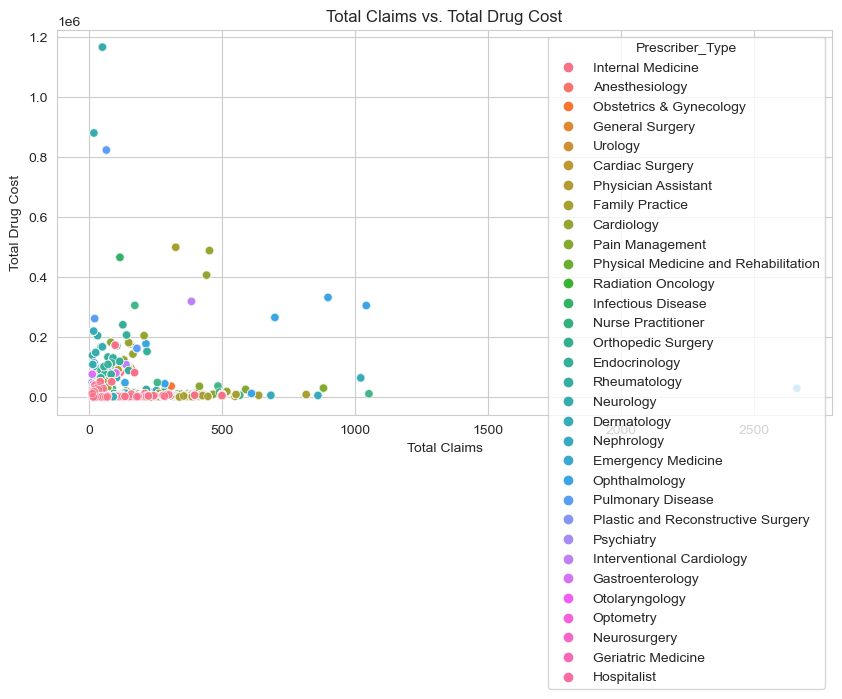

In [351]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Total_Claims', y='Tot_Drug_Cst', hue='Prescriber_Type', alpha=0.7)
plt.xlabel('Total Claims')
plt.ylabel('Total Drug Cost')
plt.title('Total Claims vs. Total Drug Cost')
plt.show()


Some specialities such as ophthalmology and cardiology are associated with high claims and high costs, that could indicate overprescribing expensive medications.

In [352]:
# Boxplot of Average Drug Cost Per Claim Per Prescriber

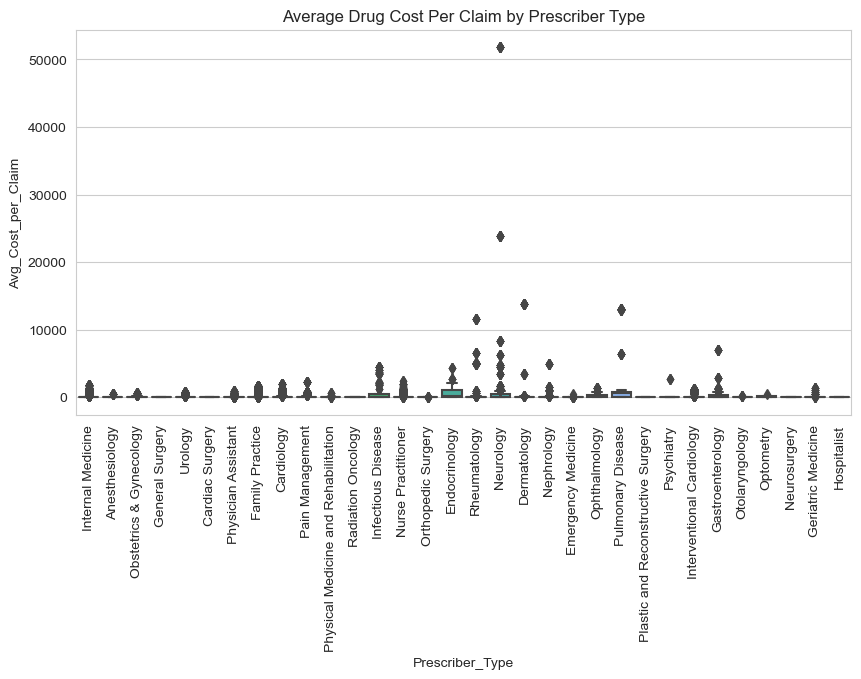

In [353]:

plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Prescriber_Type', y='Avg_Cost_per_Claim')
plt.xticks(rotation=90)
plt.title('Average Drug Cost Per Claim by Prescriber Type')
plt.show()


The average drug cost in all specialities is less than 10000, except the rheumatology, neurology, dermatology and pulmonary disease specialities. These could correspond to fraud actions in these specialities.

In [354]:
# Scatter plot: Services vs. Claims Ratio

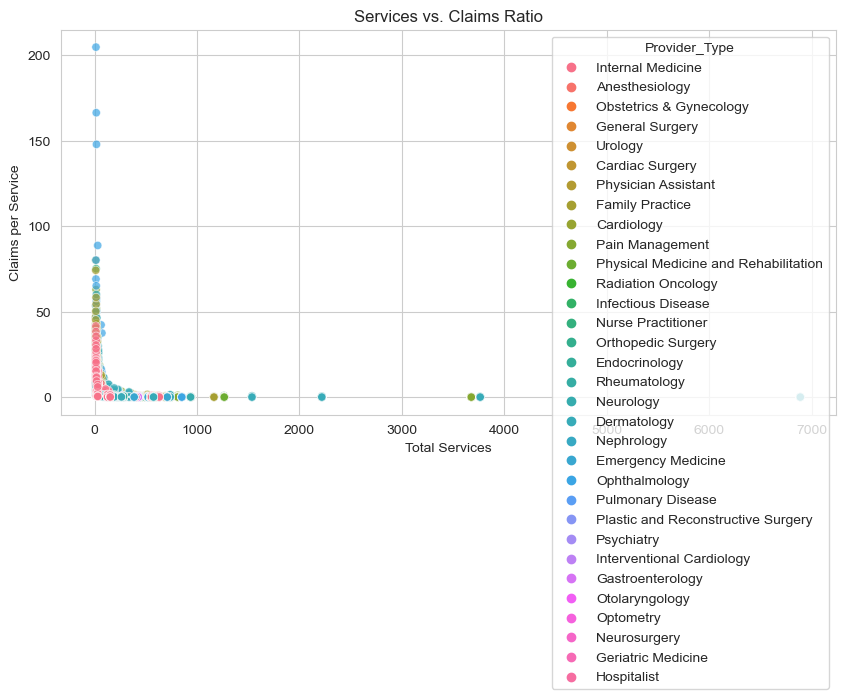

In [355]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Total_Services', y='Claims_per_Service', hue='Provider_Type', alpha=0.7)
plt.xlabel('Total Services')
plt.ylabel('Claims per Service')
plt.title('Services vs. Claims Ratio')
plt.show()


- Most points in the plot are concentrated on the left site with low number of claims. A number of claims per service exceeding 50 could be suspicious, suggesting that providers are billing an unusually high number of claims for very few services, which could indicate fraudulent billing practices.

- Some providers on the right-hand side (high total services) have a claims-per-service ratio close to 0. This could indicate normal, high-volume providers.

In [356]:
# Heatmap of High-Prescribing Specialties

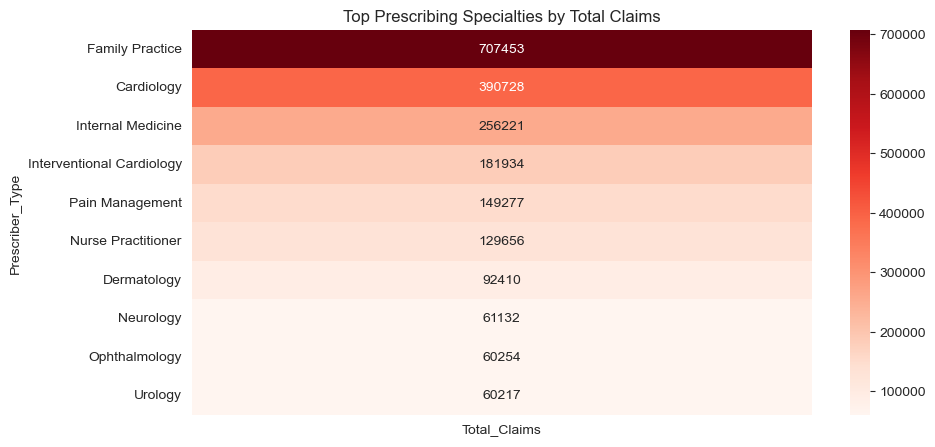

In [357]:
plt.figure(figsize=(10,5))
top_prescribers = data.groupby('Prescriber_Type')['Total_Claims'].sum().sort_values(ascending=False).head(10)
sns.heatmap(top_prescribers.to_frame(), cmap='Reds', annot=True, fmt='.0f')
plt.title('Top Prescribing Specialties by Total Claims')
plt.show()


The family practice, cardiology and internal medicine are the mostly prescribing specialities.

In [358]:
# Bar Chart of Most Prescribed Drugs by Suspicious Providers

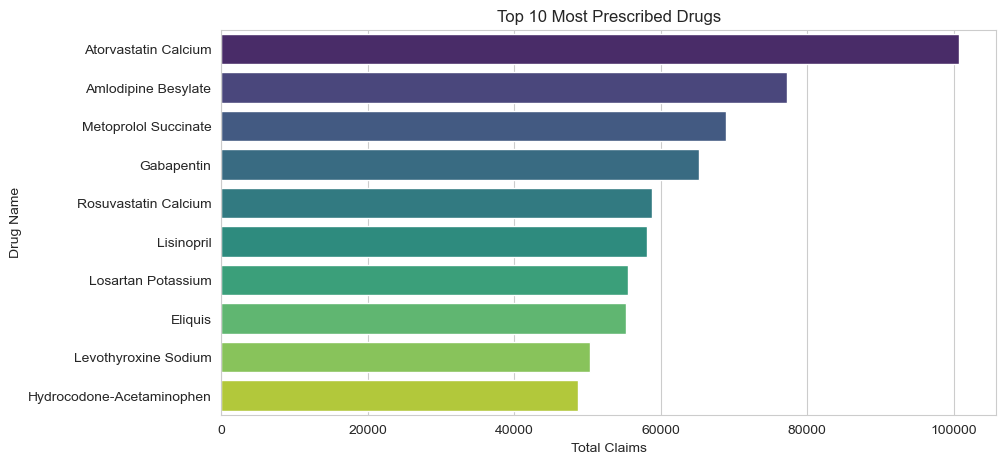

In [359]:
top_drugs = data.groupby('Brand_Name')['Total_Claims'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='viridis')
plt.xlabel('Total Claims')
plt.ylabel('Drug Name')
plt.title('Top 10 Most Prescribed Drugs')
plt.show()


## Data Preprocessing

In [36]:
data.head()

,Prescriber_NPI,Prescriber_Type,Brand_Name,Total_Claims,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Provider_Type,HCPCS_Code,Total_Services,Prescriber_FullName
0,1003000126,Internal Medicine,Prednisone,11,11.2,88,59.42,Internal Medicine,99217,44,Ardalan Enkeshafi
1,1003000126,Internal Medicine,Pravastatin Sodium,14,22.2,663,300.52,Internal Medicine,99217,44,Ardalan Enkeshafi
2,1003000126,Internal Medicine,Pantoprazole Sodium,24,35.1,1052,429.87,Internal Medicine,99217,44,Ardalan Enkeshafi
3,1003000126,Internal Medicine,Metoprolol Succinate,12,24.0,720,141.86,Internal Medicine,99217,44,Ardalan Enkeshafi
4,1003000126,Internal Medicine,Losartan Potassium,13,33.0,990,189.60,Internal Medicine,99217,44,Ardalan Enkeshafi


In [364]:
# drop unuseful features for modeling

In [365]:
data.corr()

C:\Users\sanas\AppData\Local\Temp\ipykernel_82140\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Prescriber_NPI,Total_Claims,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,HCPCS_Code,Total_Services,Avg_Cost_per_Claim,Claims_per_Service,Outlier_Flag
Prescriber_NPI,1.000000,-0.018650,0.022548,0.022195,-0.005803,0.082838,-0.013139,-0.000862,-0.009725,-0.011730
Total_Claims,-0.018650,1.000000,0.915572,0.890133,0.166054,-0.055268,0.055442,-0.039805,0.732359,0.749621
Tot_30day_Fills,0.022548,0.915572,1.000000,0.995494,0.117456,0.016463,0.014234,-0.051687,0.695780,0.778007
Tot_Day_Suply,0.022195,0.890133,0.995494,1.000000,0.117852,0.028368,0.008817,-0.049251,0.681412,0.769084
Tot_Drug_Cst,-0.005803,0.166054,0.117456,0.117852,1.000000,0.007943,0.002868,0.705404,0.127045,0.113688
HCPCS_Code,0.082838,-0.055268,0.016463,0.028368,0.007943,1.000000,-0.014946,-0.005495,-0.021970,-0.021754
Total_Services,-0.013139,0.055442,0.014234,0.008817,0.002868,-0.014946,1.000000,0.001105,-0.134420,0.025498
Avg_Cost_per_Claim,-0.000862,-0.039805,-0.051687,-0.049251,0.705404,-0.005495,0.001105,1.000000,-0.031589,-0.038657
Claims_per_Service,-0.009725,0.732359,0.695780,0.681412,0.127045,-0.021970,-0.134420,-0.031589,1.000000,0.548292
Outlier_Flag,-0.011730,0.749621,0.778007,0.769084,0.113688,-0.021754,0.025498,-0.038657,0.548292,1.000000


-High correlation exist between:
    - Tot_30day_Fills and Total_Claims
    - Tot_Day_Suply and Tot_30day_Fills
    
So, I am going to drop the features Tot_Day_Suply and Tot_30day_Fills . 

In [46]:
# drop unnecessary features for model
data.drop(columns=['Prescriber_NPI', 'Prescriber_Type', 'Brand_Name', 'HCPCS_Code', 'Prescriber_FullName', 'Provider_Type', 'Tot_Day_Suply', 'Tot_30day_Fills'], inplace=True)


## Data Modeling:

To detect frauds from non-frauds, I assumed that fraud correlates with high costs or excessive number of claims. Then, I fixed  tresholds for acceptable normal costs and claims counts. If these tresholds were exceeded, I consider it a fraud, otherwise, it is normal (no fraud detected).

In [54]:
# identify tresholds
threshold_cost = data['Avg_Cost_per_Claim'].quantile(0.90)
threshold_claims = data['Claims_per_Service'].quantile(0.90)

# create the feature fraud_label and convert it to integer, so, we can get 0 for non fraud and 1 for fraud.
data['Fraud_Label'] = ((data['Avg_Cost_per_Claim'] > threshold_cost) | 
                        (data['Claims_per_Service'] > threshold_claims)).astype(int)

print(data['Fraud_Label'])

0        0
1        0
2        0
3        0
4        0
        ..
39558    0
39559    1
39560    0
39561    0
39562    1
Name: Fraud_Label, Length: 39563, dtype: int32


In [55]:
# view data
data.head()

,Total_Claims,Tot_Drug_Cst,Total_Services,Avg_Cost_per_Claim,Claims_per_Service,Fraud_Label
0,11,59.42,44,5.401818,0.250000,0
1,14,300.52,44,21.465714,0.318182,0
2,24,429.87,44,17.911250,0.545455,0
3,12,141.86,44,11.821667,0.272727,0
4,13,189.60,44,14.584615,0.295455,0


In [56]:
# split the data 

# Define features and target variable
X = data.drop(columns=['Fraud_Label'])  
y = data['Fraud_Label']  

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the new datasets
print(X_train.shape, X_test.shape)

(31650, 5) (7913, 5)


In [57]:
# check class distribution
print(data['Fraud_Label'].value_counts(normalize=True)) 

0    0.807371
1    0.192629
Name: Fraud_Label, dtype: float64


- The fraud cases in the dataset are much fewer than non-fraud cases. This imbalance in the dataset can affect model training. The, I consider oversampling the dataset with SMOTE.
- The regression model performs better with scaled data, then I consider scaling the different features with StandardScaler().

In [58]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Train Logistic Regression with class weight balancing
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train_resampled)

# Predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[6252  137]
 [   4 1520]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6389
           1       0.92      1.00      0.96      1524

    accuracy                           0.98      7913
   macro avg       0.96      0.99      0.97      7913
weighted avg       0.98      0.98      0.98      7913



## Interpretation:

The logistic regression model performed very well in detecting fraudulent claims. The overall accuracy is 98%, meaning the model correctly classified the majority of cases.

Non-Fraudulent Cases (0s): The model had 100% precision and 98% recall, meaning almost all non-fraudulent claims were correctly classified, with only 137 false positives (legitimate claims misclassified as fraud).

Fraudulent Cases (1s): The model had 92% precision (meaning 8% of flagged fraud cases were actually legitimate) and 100% recall, meaning it successfully identified all fraudulent claims with only 4 false negatives (actual fraud cases misclassified as legitimate).

F1-score (balance between precision & recall): 0.96 for fraudulent claims, showing strong overall detection performance.


The model is highly accurate and excellent at detecting fraud, with a very low false negative rate, ensuring minimal missed fraud cases. However, the false positive rate (137 cases) suggests that some legitimate claims might be flagged incorrectly, which could lead to some unnecessary investigations. However, overall this model is performing very well. 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))